Import necessary libraries.

In [184]:
import pandas as pd
import glob  # getting all the files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read csv files with athletes data and concatenate them into one dataset.

In [185]:
path_athletes = 'Athletes'

# Get a list of all CSV files in a directory
csv_files = glob.glob(path_athletes+"/*.csv")

# Create an empty dataframe to store the combined data
athletes_df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    athletes_df = pd.concat([athletes_df, df], ignore_index=True)


In [186]:
athletes_df.head()

,Unnamed: 0,Name,Country,Age,Height
0,0,Egor TRAPEZNIKOV,RUS,-,-
1,1,Sergey KOKORIN,RUS,-,-
2,2,Brice DYER,USA,-,-
3,3,Leilei LIU,CHN,-,-
4,4,Yevgeniy MOSKALENKO,KAZ,-,-


Read csv files with events data and concatenate them into one dataset.

In [187]:
path_events = 'Events'

# Get a list of all CSV files in a directory
csv_files = glob.glob(path_events+"/*.csv")

# Create an empty dataframe to store the combined data
events_df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    events_df = pd.concat([events_df, df], ignore_index=True)

In [188]:
events_df.head()

,Unnamed: 0,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category
0,0,Andreas BAND,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-1 (Arm Amputee)
1,1,Kevin BARTKE,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-2 (Forearm Amputee)
2,2,Gabriele SCORSOLINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1
3,3,Francisco Javier AGUILAR AMOEDO,ESP,2.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1
4,4,Giulio CEVENINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B2


## **Preprocessing**

Delete unwanted column with indexes from both tables.

In [189]:
del athletes_df['Unnamed: 0']
athletes_df.head()

,Name,Country,Age,Height
0,Egor TRAPEZNIKOV,RUS,-,-
1,Sergey KOKORIN,RUS,-,-
2,Brice DYER,USA,-,-
3,Leilei LIU,CHN,-,-
4,Yevgeniy MOSKALENKO,KAZ,-,-


In [190]:
del events_df['Unnamed: 0']
events_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category
0,Andreas BAND,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-1 (Arm Amputee)
1,Kevin BARTKE,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-2 (Forearm Amputee)
2,Gabriele SCORSOLINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1
3,Francisco Javier AGUILAR AMOEDO,ESP,2.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1
4,Giulio CEVENINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B2


Explore athletes dataframe.

In [191]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15798 entries, 0 to 15797
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     15798 non-null  object
 1   Country  15793 non-null  object
 2   Age      15798 non-null  object
 3   Height   15798 non-null  object
dtypes: object(4)
memory usage: 493.8+ KB


Seems like athletes_df does have some empty values in column Country. Let's double check it.

In [192]:
athletes_df.isnull().sum()

Name       0
Country    5
Age        0
Height     0
dtype: int64

In [193]:
athletes_df[athletes_df['Country'].isna()]

,Name,Country,Age,Height
2367,Holder PLACE,NaN,124,-
2383,Erica RICCI,NaN,37,-
6032,Rustam GELMANOV TEST,NaN,41,-
6033,Jerome MEYER,NaN,-,-
7713,Test VERDOLINI,NaN,17,-


I will get rid of the rows with missing Country values.

In [194]:
athletes_df = athletes_df.dropna().reset_index(drop=True)
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15793 entries, 0 to 15792
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     15793 non-null  object
 1   Country  15793 non-null  object
 2   Age      15793 non-null  object
 3   Height   15793 non-null  object
dtypes: object(4)
memory usage: 493.7+ KB


Check if any rows are duplicated. If so, keep only the first occurence and delete duplicates.

In [195]:
duplicate_rows = athletes_df[athletes_df.duplicated(keep='first')]
duplicate_rows.shape[0]

59

In [196]:
athletes_df.drop_duplicates(keep='first', inplace=True)
athletes_df.shape

(15734, 4)

In [197]:
athletes_df.describe()

,Name,Country,Age,Height
count,15734,15734,15734,15734
unique,15615,97,124,56
top,Roman KRAJNIK,USA,-,-
freq,4,1203,7268,14829


Let's replace missing Age and Height values with NaN, and convert remaining ones to number.

In [198]:
athletes_df['Age'] = pd.to_numeric(athletes_df['Age'], errors='coerce' )
athletes_df['Height'] = pd.to_numeric(athletes_df['Height'], errors='coerce')

In [199]:
athletes_df.describe()

,Age,Height
count,8466.000000,905.000000
mean,28.210017,170.908287
std,24.565336,53.357902
min,4.000000,1.000000
25%,19.000000,164.000000
50%,24.000000,170.000000
75%,34.000000,176.000000
max,2019.000000,1710.000000


Now let's explore events dataframe.

In [200]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98405 entries, 0 to 98404
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Athlete          98405 non-null  object 
 1   Athlete_Country  98405 non-null  object 
 2   Rank             98253 non-null  float64
 3   Event_Name       98405 non-null  object 
 4   Discipline       98405 non-null  object 
 5   Category         98405 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.5+ MB


In [201]:
events_df['Rank'].isna().sum()

152

Rows with missing Rank are not relevant. Let's delete them.

In [202]:
events_df = events_df.dropna().reset_index(drop=True)
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98253 entries, 0 to 98252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Athlete          98253 non-null  object 
 1   Athlete_Country  98253 non-null  object 
 2   Rank             98253 non-null  float64
 3   Event_Name       98253 non-null  object 
 4   Discipline       98253 non-null  object 
 5   Category         98253 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.5+ MB


In [203]:
events_df.describe()

,Rank
count,98253.000000
mean,21.563219
std,18.880229
min,1.000000
25%,8.000000
50%,17.000000
75%,31.000000
max,999.000000


The maximum rank of 999 does not look correct. Let's see how many of those there is in the dataset.

In [204]:
len(events_df.loc[events_df['Rank'] == 999])

6

I assume that these rank are for different reasons not applicable and they could corrupt any statistical calculations. I will delete these rows.

In [205]:
events_df.drop(events_df.loc[events_df['Rank'] == 999].index, inplace=True)
events_df.reset_index(drop=True, inplace=True)

I want to merge both dataframes into one, but I need to make sure that names and countries do not have any unnecessary whitespaces.

In [206]:
athletes_df['Name'] = athletes_df['Name'].str.strip()
events_df['Athlete'] = events_df['Athlete'].str.strip()

athletes_df['Country'] = athletes_df['Country'].str.strip()
events_df['Athlete_Country'] = events_df['Athlete_Country'].str.strip()

In [207]:
merged_df = events_df.merge(athletes_df, left_on=['Athlete', 'Athlete_Country'], right_on=['Name', 'Country'], how='left')

Let's remove duplicated columns and rename Age and Height columns.

In [208]:
merged_df = merged_df.drop(['Name', 'Country'], axis=1).rename(columns={'Age':'Athlete_Age', 'Height':'Athlete_Height'})
merged_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height
0,Andreas BAND,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-1 (Arm Amputee),50.0,NaN
1,Kevin BARTKE,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-2 (Forearm Amputee),38.0,182.0
2,Gabriele SCORSOLINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1,24.0,NaN
3,Francisco Javier AGUILAR AMOEDO,ESP,2.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1,41.0,167.0
4,Giulio CEVENINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B2,30.0,NaN


In the last step of preprocessing I will split the dataframe into two sets: one for climbing events, and one for paraclimbing events.

In [209]:
mask = merged_df['Event_Name'].str.lower().str.contains('paraclimbing')
climb_df = merged_df[~mask]
climb_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height
212,Kokoro FUJII,JPN,1.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,31.0,176.0
213,Haibin QU,CHN,2.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,31.0,NaN
214,Yoshiyuki OGATA,JPN,3.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,26.0,172.0
215,Zida MA,CHN,4.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,31.0,NaN
216,Khosro HASHEMZADEH,IRI,5.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,33.0,NaN


In [210]:
paraclimb_df = merged_df[mask]
paraclimb_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height
0,Andreas BAND,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-1 (Arm Amputee),50.0,NaN
1,Kevin BARTKE,GER,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men AU-2 (Forearm Amputee),38.0,182.0
2,Gabriele SCORSOLINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1,24.0,NaN
3,Francisco Javier AGUILAR AMOEDO,ESP,2.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B1,41.0,167.0
4,Giulio CEVENINI,ITA,1.0,Paraclimbing Master (L) - Imst (AUT) 2017,lead,Men visual impairment B2,30.0,NaN


## **Question 1**
####Which country has the most climbers participating in championships - considering number and ratio of population?

In order to resolve the question I need a dataset with each country's population, as well as the table with International Olympic Comitee country codes (some of those are different than the CCA3 codes).

In [211]:
pop = pd.read_csv('world_population_data.csv', usecols=['cca3', 'country', 'continent', '2023 population'])
pop.head()

,cca3,country,continent,2023 population
0,IND,India,Asia,1428627663
1,CHN,China,Asia,1425671352
2,USA,United States,North America,339996563
3,IDN,Indonesia,Asia,277534122
4,PAK,Pakistan,Asia,240485658


In [212]:
ioc_codes = pd.read_csv('IOC_codes.csv', index_col=0)
ioc_codes.head()

,Code,Name
0,AFG,Afghanistan
1,AHO,Netherlands Antilles
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


### **Let's explore dataframe with climbing data.**

In [213]:
groupped_df = climb_df.groupby(['Athlete','Athlete_Country'])['Athlete_Country'].count().sort_values(ascending=False).reset_index(name='Count')
groupped_df = groupped_df.groupby(['Athlete_Country'])['Athlete_Country'].count().sort_values(ascending=False).reset_index(name='Count')
groupped_df['%'] = groupped_df['Count'].apply(lambda x:100*x / groupped_df['Count'].sum()).round(2)
groupped_df

,Athlete_Country,Count,%
0,FRA,862,7.79
1,USA,803,7.26
2,RUS,685,6.19
3,ITA,438,3.96
4,AUT,408,3.69
...,...,...,...
81,IRQ,1,0.01
82,BOL,1,0.01
83,BIH,1,0.01
84,MRI,1,0.01


I need to create another column with full country's name based on the world population dataset.

In [214]:
groupped_df['Athlete_Country'].values

array(['FRA', 'USA', 'RUS', 'ITA', 'AUT', 'CAN', 'GER', 'GBR', 'CZE',
       'UKR', 'JPN', 'SUI', 'POL', 'SLO', 'KOR', 'BEL', 'CHN', 'ESP',
       'AUS', 'IRI', 'SGP', 'INA', 'SWE', 'KAZ', 'BUL', 'NOR', 'NED',
       'MEX', 'NZL', 'ISR', 'ECU', 'RSA', 'SVK', 'HUN', 'IND', 'MAS',
       'ROU', 'POR', 'TUR', 'TPE', 'HKG', 'GRE', 'DEN', 'CHI', 'THA',
       'PHI', 'CRO', 'FIN', 'VEN', 'BRA', 'COL', 'LTU', 'New Caledonia',
       'ARG', 'BLR', 'IRL', 'GEO', 'LAT', 'SRB', 'LUX', 'MGL', 'KGZ',
       'MKD', 'AZE', 'GUA', 'CFR', 'NEP', 'CRC', 'UZB', 'CYP', 'PER',
       'PAK', 'CAM', 'MAC', 'HON', 'AND', 'ESA', 'EST', 'LBN', 'ISL',
       'PUR', 'IRQ', 'BOL', 'BIH', 'MRI', 'JOR'], dtype=object)

In [215]:
groupped_df['Athlete_Country'] = groupped_df['Athlete_Country'].str.strip()

In [216]:
groupped_df = pd.merge(groupped_df, ioc_codes, left_on='Athlete_Country', right_on='Code', how='left')
del groupped_df['Code']
groupped_df.head()

,Athlete_Country,Count,%,Name
0,FRA,862,7.79,France
1,USA,803,7.26,United States
2,RUS,685,6.19,NaN
3,ITA,438,3.96,Italy
4,AUT,408,3.69,Austria


Let's verify if any country codes were not matched.

In [217]:
groupped_df[groupped_df['Name'].isna()]

,Athlete_Country,Count,%,Name
2,RUS,685,6.19,NaN
24,BUL,149,1.35,NaN
52,New Caledonia,42,0.38,NaN
60,MGL,25,0.23,NaN
65,CFR,20,0.18,NaN
73,MAC,5,0.05,NaN


Since there are only few missing values, I will replace them one by one.

In [218]:
groupped_df.loc[groupped_df['Athlete_Country'] == 'RUS', 'Name'] = 'Russia'
groupped_df.loc[groupped_df['Athlete_Country'] == 'BUL', 'Name'] = 'Bulgaria'
groupped_df.loc[groupped_df['Athlete_Country'] == 'New Caledonia', 'Name'] = 'New Caledonia'
groupped_df.loc[groupped_df['Athlete_Country'] == 'MGL', 'Name'] = 'Mongolia'
groupped_df.loc[groupped_df['Athlete_Country'] == 'MAC', 'Name'] = 'Macau'
groupped_df.loc[groupped_df['Athlete_Country'] == 'CFR', 'Name'] = 'CFR'

In [219]:
threshold = 2
main_countries = groupped_df[groupped_df['%'] >= threshold]
other_countries = groupped_df[groupped_df['%'] < threshold]

new_row = pd.DataFrame({'Count': [other_countries['Count'].sum()],
                        '%': [other_countries['%'].sum()],
                       'Name' :['Other ' +str(other_countries['Count'].count())+ ' countries with < ' +str(threshold)+' % occurences']})

main_countries = pd.concat([main_countries, new_row], ignore_index=True)

main_countries

,Athlete_Country,Count,%,Name
0,FRA,862,7.79,France
1,USA,803,7.26,United States
2,RUS,685,6.19,Russia
3,ITA,438,3.96,Italy
4,AUT,408,3.69,Austria
5,CAN,395,3.57,Canada
6,GER,382,3.45,Germany
7,GBR,380,3.43,Great Britain
8,CZE,330,2.98,Czechia
9,UKR,315,2.85,Ukraine


Text(0.5, 1.0, "Occurrences of Countries' Representants in International Climbing Events")

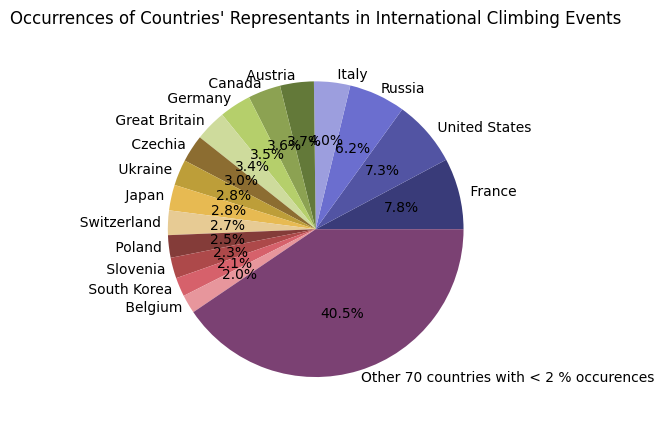

In [220]:
plt.pie(main_countries['Count'], labels=main_countries['Name'],
                                autopct='%1.1f%%', colors=sns.color_palette("tab20b"),
                                labeldistance=1.05)
plt.title('Occurrences of Countries\' Representants in International Climbing Events', pad=15)

I want to see how the statistics will look if we use % of country's population instead of number of participants.

First thing that needs to be done is to create a column with calculated percentage of population.

In [221]:
pop['country'] = pop['country'].str.strip()
groupped_df['Name'] = groupped_df['Name'].str.strip()
climb_pop_df = pd.merge(groupped_df, pop[['country', '2023 population']], left_on='Name', right_on='country', how='left')
del climb_pop_df['country']
climb_pop_df

,Athlete_Country,Count,%,Name,2023 population
0,FRA,862,7.79,France,64756584.0
1,USA,803,7.26,United States,339996563.0
2,RUS,685,6.19,Russia,144444359.0
3,ITA,438,3.96,Italy,58870762.0
4,AUT,408,3.69,Austria,8958960.0
...,...,...,...,...,...
81,IRQ,1,0.01,Iraq,45504560.0
82,BOL,1,0.01,Bolivia,12388571.0
83,BIH,1,0.01,Bosnia and Herzegovina,3210847.0
84,MRI,1,0.01,Mauritius,1300557.0


In [222]:
climb_pop_df[climb_pop_df['2023 population'].isna()]

,Athlete_Country,Count,%,Name,2023 population
7,GBR,380,3.43,Great Britain,NaN
8,CZE,330,2.98,Czechia,NaN
39,TPE,83,0.75,Republic of China[188],NaN
62,MKD,22,0.20,Macedonia,NaN
65,CFR,20,0.18,CFR,NaN


In [223]:
climb_pop_df.loc[climb_pop_df['Name'] == 'Czechia', '2023 population'] = pop.loc[pop['country'] == 'Czech Republic', '2023 population'].values[0]
climb_pop_df.loc[climb_pop_df['Name'] == 'Great Britain', '2023 population'] = pop.loc[pop['country'] == 'United Kingdom', '2023 population'].values[0]
climb_pop_df.loc[climb_pop_df['Name'] == 'Republic of China[188]', '2023 population'] = pop.loc[pop['country'] == 'Taiwan', '2023 population'].values[0]
climb_pop_df.loc[climb_pop_df['Name'] == 'Macedonia', '2023 population'] = pop.loc[pop['country'] == 'North Macedonia', '2023 population'].values[0]

As the research shows CFR is a separate climbing federation. However, as there are only 20 representants, in further steps I will assign 0 to '1/100000 of pop' column so it will not be relevant for the results.

In [224]:
climb_pop_df['1/100000 of pop'] = ((climb_pop_df['Count'] / climb_pop_df['2023 population']) * 100000).round(3)
climb_pop_df.head()

,Athlete_Country,Count,%,Name,2023 population,1/100000 of pop
0,FRA,862,7.79,France,64756584.0,1.331
1,USA,803,7.26,United States,339996563.0,0.236
2,RUS,685,6.19,Russia,144444359.0,0.474
3,ITA,438,3.96,Italy,58870762.0,0.744
4,AUT,408,3.69,Austria,8958960.0,4.554


In [225]:
climb_pop_df.loc[climb_pop_df['Name']=='CFR', '1/100000 of pop'] = 0

In [226]:
climb_pop_df = climb_pop_df.sort_values(by='1/100000 of pop', ascending=False)
climb_pop_df

,Athlete_Country,Count,%,Name,2023 population,1/100000 of pop
52,New Caledonia,42,0.38,New Caledonia,2.929910e+05,14.335
13,SLO,251,2.27,Slovenia,2.119675e+06,11.841
4,AUT,408,3.69,Austria,8.958960e+06,4.554
59,LUX,26,0.23,Luxembourg,6.547680e+05,3.971
75,AND,3,0.03,Andorra,8.008800e+04,3.746
...,...,...,...,...,...,...
82,BOL,1,0.01,Bolivia,1.238857e+07,0.008
34,IND,95,0.86,India,1.428628e+09,0.007
71,PAK,6,0.05,Pakistan,2.404857e+08,0.002
81,IRQ,1,0.01,Iraq,4.550456e+07,0.002


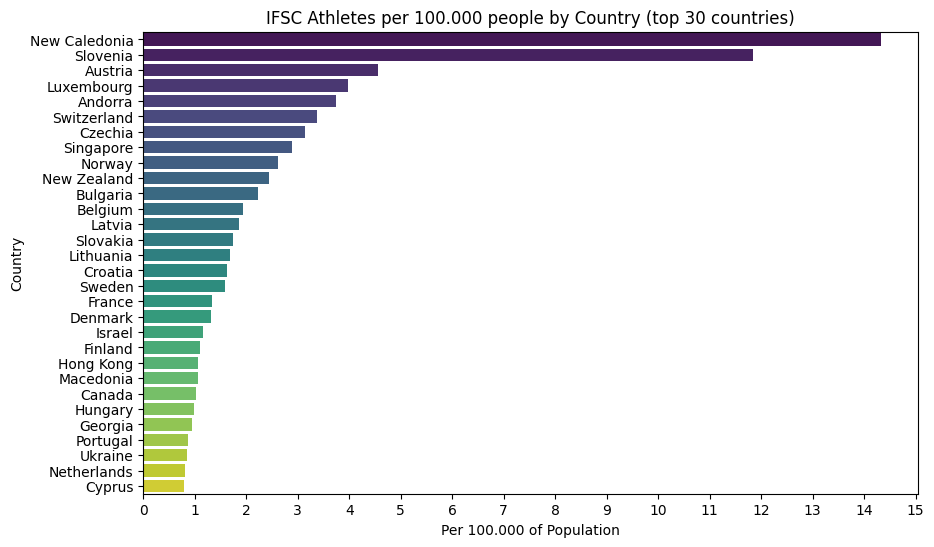

In [227]:
country_thresh = 30
df_for_plot = climb_pop_df.head(country_thresh)

plt.figure(figsize=(10, 6))
sns.barplot(x='1/100000 of pop', y='Name', data=df_for_plot, palette='viridis', hue='Name', orient='h')
plt.title(f'IFSC Athletes per 100.000 people by Country (top {country_thresh} countries)')
plt.ylabel('Country')
plt.xlabel('Per 100.000 of Population')
plt.xticks(np.arange(min(climb_pop_df['1/100000 of pop']), max(climb_pop_df['1/100000 of pop'])+1, 1.0))
plt.show()

I want to see how my fellow polish climbers look against the other countries' representants.

Text(0.5, 1.0, "Occurrences of Countries' Representants in International Climbing Events")

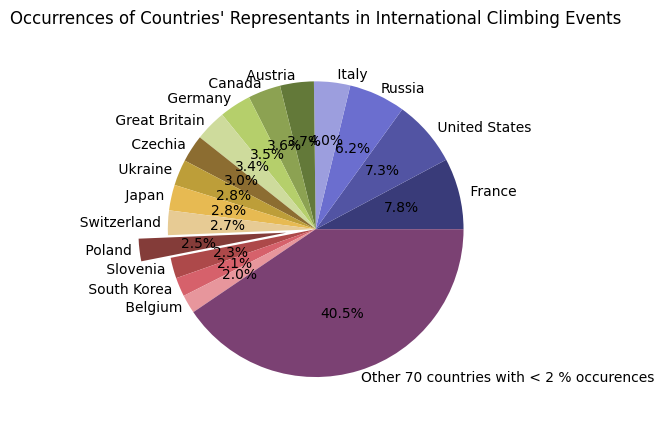

In [228]:
# explode list will have each value represent each country, where 0 is for country that will not be highlighted

explode = [0.2 if name.strip() == 'Poland' else 0 for name in main_countries['Name'] ]

plt.pie(main_countries['Count'], labels=main_countries['Name'], autopct='%1.1f%%', colors=sns.color_palette("tab20b"), labeldistance=1.05, explode=explode)
plt.title('Occurrences of Countries\' Representants in International Climbing Events', pad=15)

In [229]:
climb_pop_df.loc[climb_pop_df['Athlete_Country'] == 'POL']

,Athlete_Country,Count,%,Name,2023 population,1/100000 of pop
12,POL,272,2.46,Poland,41026067.0,0.663


### **Now let's perform the same exploration for paraclimbing dataset.**

In [230]:
pgroupped_df = paraclimb_df.groupby(['Athlete','Athlete_Country'])['Athlete_Country'].count().sort_values(ascending=False).reset_index(name='Count')
pgroupped_df = paraclimb_df.groupby(["Athlete_Country"])['Athlete_Country'].count().sort_values(ascending=False).reset_index(name='Count')
pgroupped_df['%'] = pgroupped_df['Count'].apply(lambda x:100*x / pgroupped_df['Count'].sum()).round(2)
pgroupped_df.head()


,Athlete_Country,Count,%
0,GBR,161,14.36
1,ITA,160,14.27
2,FRA,125,11.15
3,ESP,118,10.53
4,USA,111,9.90


In [231]:
pgroupped_df['Athlete_Country'] = pgroupped_df['Athlete_Country'].str.strip()
pgroupped_df = pd.merge(pgroupped_df, ioc_codes, left_on='Athlete_Country', right_on='Code', how='left')
del pgroupped_df['Code']
pgroupped_df.head()

,Athlete_Country,Count,%,Name
0,GBR,161,14.36,Great Britain
1,ITA,160,14.27,Italy
2,FRA,125,11.15,France
3,ESP,118,10.53,Spain
4,USA,111,9.90,United States


In [232]:
pgroupped_df[pgroupped_df['Name'].isna()]

,Athlete_Country,Count,%,Name
9,RUS,27,2.41,NaN


In [233]:
pgroupped_df.loc[pgroupped_df['Athlete_Country'] == 'RUS', 'Name'] = 'Russia'

In [234]:
pthreshold = 2
pmain_countries = pgroupped_df[pgroupped_df['%'] >= pthreshold]
pother_countries = pgroupped_df[pgroupped_df['%'] < pthreshold]


new_row = pd.DataFrame({'Count': [pother_countries['Count'].sum()],
                        '%': [pother_countries['%'].sum()],
                       'Name' :['Other ' +str(pother_countries['Count'].count())+ ' countries with < ' +str(pthreshold)+' % occurences']})

pmain_countries = pd.concat([pmain_countries, new_row], ignore_index=True)

pmain_countries

,Athlete_Country,Count,%,Name
0,GBR,161,14.36,Great Britain
1,ITA,160,14.27,Italy
2,FRA,125,11.15,France
3,ESP,118,10.53,Spain
4,USA,111,9.90,United States
5,GER,106,9.46,Germany
6,JPN,51,4.55,Japan
7,AUT,41,3.66,Austria
8,ISR,41,3.66,Israel
9,RUS,27,2.41,Russia


Text(0.5, 1.0, 'Occurrences of Countries Representants in International ParaClimbing Events')

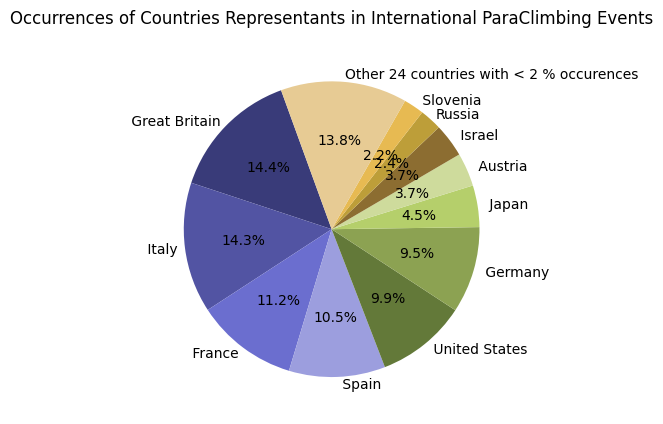

In [235]:
plt.pie(pmain_countries['Count'], labels=pmain_countries['Name'], autopct='%1.1f%%', colors=sns.color_palette("tab20b"), startangle=110, labeldistance=1.05)
plt.title('Occurrences of Countries Representants in International ParaClimbing Events', pad=15)

In [236]:
pop['country'] = pop['country'].str.strip()
pgroupped_df['Name'] = pgroupped_df['Name'].str.strip()
pclimb_pop_df = pd.merge(pgroupped_df, pop[['country', '2023 population']], left_on='Name', right_on='country', how='left')
del pclimb_pop_df['country']
pclimb_pop_df.head()

,Athlete_Country,Count,%,Name,2023 population
0,GBR,161,14.36,Great Britain,NaN
1,ITA,160,14.27,Italy,58870762.0
2,FRA,125,11.15,France,64756584.0
3,ESP,118,10.53,Spain,47519628.0
4,USA,111,9.90,United States,339996563.0


In [237]:
pclimb_pop_df[pclimb_pop_df['2023 population'].isna()]

,Athlete_Country,Count,%,Name,2023 population
0,GBR,161,14.36,Great Britain,NaN


In [238]:
pclimb_pop_df.loc[pclimb_pop_df['Name'] == 'Great Britain', '2023 population'] = pop.loc[pop['country'] == 'United Kingdom', '2023 population'].values[0]

In [239]:
pclimb_pop_df['1/100000 of pop'] = ((pclimb_pop_df['Count'] / pclimb_pop_df['2023 population']) * 100000).round(3)
pclimb_pop_df.head()

,Athlete_Country,Count,%,Name,2023 population,1/100000 of pop
0,GBR,161,14.36,Great Britain,67736802.0,0.238
1,ITA,160,14.27,Italy,58870762.0,0.272
2,FRA,125,11.15,France,64756584.0,0.193
3,ESP,118,10.53,Spain,47519628.0,0.248
4,USA,111,9.90,United States,339996563.0,0.033


In [240]:
pclimb_pop_df = pclimb_pop_df.sort_values(by='1/100000 of pop', ascending=False)
pclimb_pop_df.head()

,Athlete_Country,Count,%,Name,2023 population,1/100000 of pop
10,SLO,25,2.23,Slovenia,2119675.0,1.179
7,AUT,41,3.66,Austria,8958960.0,0.458
8,ISR,41,3.66,Israel,9174520.0,0.447
1,ITA,160,14.27,Italy,58870762.0,0.272
3,ESP,118,10.53,Spain,47519628.0,0.248


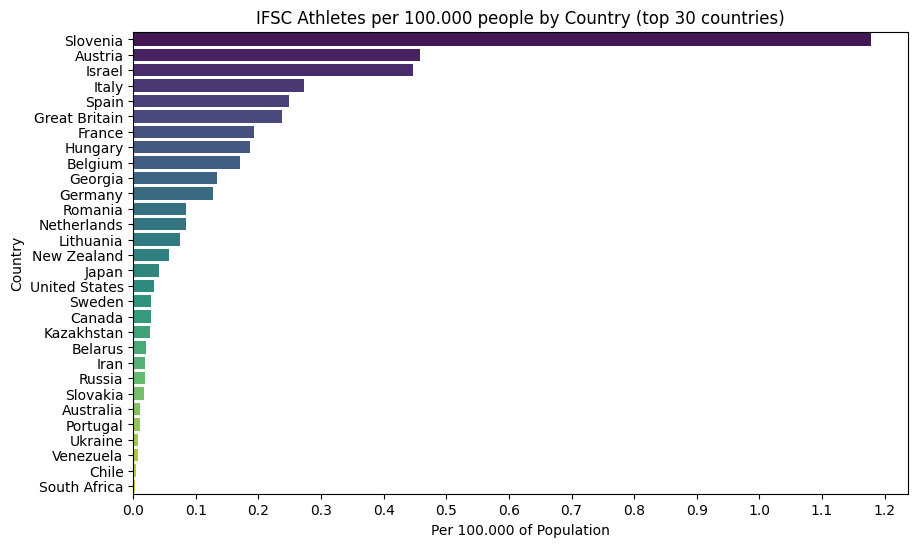

In [241]:
country_thresh = 30
pdf_for_plot = pclimb_pop_df.head(country_thresh)

plt.figure(figsize=(10, 6))
sns.barplot(x='1/100000 of pop', y='Name', data=pdf_for_plot, palette='viridis', hue='Name', orient='h')
plt.title(f'IFSC Athletes per 100.000 people by Country (top {country_thresh} countries)')
plt.ylabel('Country')
plt.xlabel('Per 100.000 of Population')
plt.xticks(np.arange(min(pclimb_pop_df['1/100000 of pop']), max(pclimb_pop_df['1/100000 of pop'])+0.1, 0.1))
plt.show()

I will check if any polish athlete has ever participated in ParaClimbing event.

In [242]:
(pgroupped_df['Name'] == 'Poland').sum()

0

No polish athlete ever participated in Paraclimbing Event.

### **Question 1 conclusions:**
When we look at the plot with number of athletes per country we can see that top 5 are: France, USA, Russia, Italy and Austria. Russia and USA are huge countries with big population, so statistically, it is more likely than they will have more athletes. However, looking at the plot with the ratio of athletes to population, we see that Russia and USA are not even in top 30 countries. The country with the highest ratio is New Caledonia, which makes sense given its small size. Following are other small countries, such as Slovenia and Austria. Austria again appears in the top 5, which means that they generally have a lot of competing climbers, and this sport must be extremely popular, likely due to picturesque mountains that Austria is covered with.

In paraclimbing events, the leading countries by number of athletes are Great Britain, Italy, and France. However, the ratio shows that again Slovenia and Austria have the most athletes per 100,000 population.

I wanted to compare polish climbers with the rest of the world, but it seems that there are not many athletes competing in the international events. This is surprising as it is quite popular sport.

## **Question 2**
####How often climbers are in top 3 when competition is held in their own country?

First let's take a look at the events.

In [243]:
climb_df['Event_Name'].unique()

array(['Asian Continental Championships - Tehran (IRI) 2017',
       'Asia Cup - Wanxianshan (CHN) 2017',
       'Asian Youth Championships - Singapore (SGP) 2017',
       'European Championship (L,S) - Campitello di Fassa (ITA) 2017',
       'European Championship (B) - Munich (GER) 2017',
       'European Youth Cup (B) - Graz (AUT) 2017',
       'European Youth Cup (S) - Tarnow (POL) 2017',
       'European Youth Cup (B) - Soure (POR) 2017',
       'European Youth Cup (L) - Imst (AUT) 2017',
       'European Youth Cup (L) - Dornbirn (AUT) 2017',
       'European Youth Cup (S) - Bologna (ITA) 2017',
       'European Youth Cup (L) - Uster (SUI) 2017',
       "European Youth Cup (B) - L'Argentière (FRA) 2017",
       'European Youth Cup (B) - Sofia (BUL) 2017',
       'European Youth Cup (L) - Mitterdorf (AUT) 2017',
       'European Youth Cup (S) - Imst (AUT) 2017',
       'European Youth Championships (B) - Slany (CZE) 2017',
       'European Youth Championships (L,S) - Perm (RUS) 201

For this problem I want to consider only Worldcups and World Championships.

In [244]:
world_climb_df = climb_df.loc[climb_df['Event_Name'].str.lower().str.contains('world')]
world_climb_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height
4136,Keiichiro KORENAGA,JPN,1.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,28.0,NaN
4137,Yuki HADA,JPN,2.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,27.0,NaN
4138,Sean MCCOLL,CAN,3.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,36.0,169.0
4139,Romain DESGRANGES,FRA,4.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,41.0,NaN
4140,Domen SKOFIC,SLO,5.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,30.0,177.0


In the beginning I need to create a column with extracted country code and column with True-False values, where True means that the event was held in the athlete's country. To achieve that, it is required to extract country code from event name using RegEx pattern.

In [245]:
world_climb_df['Event_Country'] = world_climb_df['Event_Name'].str.extract(r'\(\s*([A-Z]{3})\s*\)')
world_climb_df.head()

<ipython-input-245-eab2f3c074ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_climb_df['Event_Country'] = world_climb_df['Event_Name'].str.extract(r'\(\s*([A-Z]{3})\s*\)')


,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height,Event_Country
4136,Keiichiro KORENAGA,JPN,1.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,28.0,NaN,POL
4137,Yuki HADA,JPN,2.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,27.0,NaN,POL
4138,Sean MCCOLL,CAN,3.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,36.0,169.0,POL
4139,Romain DESGRANGES,FRA,4.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,41.0,NaN,POL
4140,Domen SKOFIC,SLO,5.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,30.0,177.0,POL


I need to check whether all events matched regex pattern.

In [246]:
world_climb_df[world_climb_df['Event_Country'].isna()]['Event_Name'].unique()

array(['IFSC - Climbing World Championships (B,L,S) - Moscow 2021',
       'IFSC World Championship Lead Group A - Arco 2011',
       'IFSC World Championship Lead Group B - Arco 2011',
       'IFSC World Championship Lead Group A - Paris 2012',
       'IFSC World Championship Lead Group B - Paris 2012',
       'UIAA Worldcup - Wien 1991', 'UIAA Worldcup - Clusone 1991',
       'UIAA Worldcup - Innsbruck 1991',
       'UIAA World Championship - Frankfurt 1991',
       'UIAA Worldcup - Tokio 1991', 'UIAA Worldcup - Nürnberg 1991',
       'UIAA Worldcup - Birmingham 1991', 'UIAA Worldcup - Zürich 1992',
       'UIAA Worldcup - Kobe 1992', 'UIAA Worldcup - Nürnberg 1992',
       'UIAA Worldcup - St. Pölten 1992', 'UIAA Worldcup - Laval 1992',
       'UIAA Worldcup - Birmingham 1992',
       'UIAA Youth Worldchampionship - Basel 1992',
       'UIAA Worldcup - Frankfurt 1993',
       'UIAA World Championship - Innsbruck 1993',
       'UIAA Worldcup - Zürich 1993', 'UIAA Worldcup - Toulon 19

For events in Moscow 2021, Arco 2011 and Paris 2012 I will manually fill the Event_Country column.

In [247]:
world_climb_df.loc[world_climb_df['Event_Name'].str.contains('Arco 2011'), 'Event_Country'] = 'ITA'
world_climb_df.loc[world_climb_df['Event_Name'].str.contains('Paris 2012'), 'Event_Country'] = 'FRA'
world_climb_df.loc[world_climb_df['Event_Name'].str.contains('Moscow 2021'), 'Event_Country'] = 'RUS'

The remaining events were held before year 1998, so I will ignore them for this problem's resolution, as they should not corrupt the statistics.

In [248]:
world_climb_df = world_climb_df.loc[world_climb_df['Event_Country'].notna()]
world_climb_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height,Event_Country
4136,Keiichiro KORENAGA,JPN,1.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,28.0,NaN,POL
4137,Yuki HADA,JPN,2.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,27.0,NaN,POL
4138,Sean MCCOLL,CAN,3.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,36.0,169.0,POL
4139,Romain DESGRANGES,FRA,4.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,41.0,NaN,POL
4140,Domen SKOFIC,SLO,5.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,30.0,177.0,POL


In [249]:
world_climb_df['Is_Country_Match?'] = world_climb_df['Athlete_Country'] == world_climb_df['Event_Country']
world_climb_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height,Event_Country,Is_Country_Match?
4136,Keiichiro KORENAGA,JPN,1.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,28.0,NaN,POL,False
4137,Yuki HADA,JPN,2.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,27.0,NaN,POL,False
4138,Sean MCCOLL,CAN,3.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,36.0,169.0,POL,False
4139,Romain DESGRANGES,FRA,4.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,41.0,NaN,POL,False
4140,Domen SKOFIC,SLO,5.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,30.0,177.0,POL,False


I will create new dataframe with only athletes that competed in their own country, and then use it to show how often they end up on a podium or on a lower rank.

In [250]:
country_match_df = world_climb_df.loc[world_climb_df['Is_Country_Match?'] == True]
country_match_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height,Event_Country,Is_Country_Match?
4142,Maciej DOBRZANSKI,POL,7.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,34.0,NaN,POL,True
4155,Karina MIROSLAW,POL,10.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Women,30.0,NaN,POL,True
4166,Andrzej MECHERZYNSKI-WIKTOR,POL,9.0,The World Games 2017 - Wroclaw (POL) 2017,boulder,Men,39.0,NaN,POL,True
4178,Katarzyna EKWINSKA,POL,10.0,The World Games 2017 - Wroclaw (POL) 2017,boulder,Women,29.0,NaN,POL,True
4183,Marcin DZIENSKI,POL,4.0,The World Games 2017 - Wroclaw (POL) 2017,speed,Men,31.0,166.0,POL,True


Let's see if the discipline and category matter.

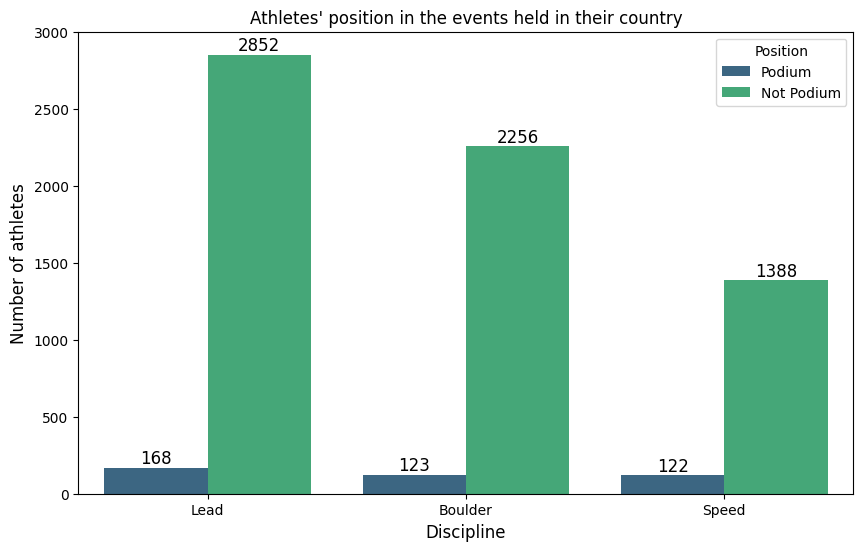

In [251]:
# Calculate value counts for both DataFrames
podium_counts = (country_match_df.loc[country_match_df['Rank'] <= 3]).value_counts('Discipline')
not_podium_counts = (country_match_df.loc[country_match_df['Rank'] >3]).value_counts('Discipline')

# Find common disciplines and align data
common_disciplines = podium_counts.index.intersection(not_podium_counts.index)
podium_counts = podium_counts.loc[common_disciplines]
not_podium_counts = not_podium_counts.loc[common_disciplines]

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Discipline': common_disciplines.str.capitalize(),
    'Podium': podium_counts.values,
    'Not Podium': not_podium_counts.values
})

# Melt the DataFrame to long format for seaborn
plot_df_melted = plot_df.melt(id_vars='Discipline', value_vars=['Podium', 'Not Podium'],
                           var_name='Position', value_name='Count')

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Discipline', y='Count', palette='viridis', hue='Position', data=plot_df_melted)
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
plt.title('Athletes\' position in the events held in their country')
plt.ylabel('Number of athletes', fontsize=12)
plt.yticks(np.arange(0, max(ax.get_ylim())+500, 500.0))
plt.xlabel('Discipline', fontsize=12)
plt.show()

Looking at the plot above we can assume that competing in their own country does not increase athletes the chances of being on the podium. To confirm this assumption, let's check the correlation between those two facts.

In [252]:
#Add booolean column with information about being on the podium or not

world_climb_df['Is_Podium?'] = world_climb_df['Rank'] <= 3
world_climb_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height,Event_Country,Is_Country_Match?,Is_Podium?
4136,Keiichiro KORENAGA,JPN,1.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,28.0,NaN,POL,False,True
4137,Yuki HADA,JPN,2.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,27.0,NaN,POL,False,True
4138,Sean MCCOLL,CAN,3.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,36.0,169.0,POL,False,True
4139,Romain DESGRANGES,FRA,4.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,41.0,NaN,POL,False,False
4140,Domen SKOFIC,SLO,5.0,The World Games 2017 - Wroclaw (POL) 2017,lead,Men,30.0,177.0,POL,False,False


In [253]:
world_climb_df['Is_Country_Match?'].corr(world_climb_df['Is_Podium?'])

-0.018513415263655478

### **Question 2 conclusions:**
The correlation coefficient is close to 0, which means there is neither positive, nor negative correlation between competing in own country and the results.

## **Question 3**
####Does being experienced in competitions help with achieving higher rank?

To answer Question 3, I want to check the data for male and female athletes separately, as well as for each discipline individually. To achieve that, first I will split the data into two genders, and then create a function to calculate necesary results.

To find out how to split the data into genders, I need to see what are the possible categories.

In [254]:
climb_df['Category'].unique()

array(['Men', 'Women', 'Juniors Male', 'Youth A Male', 'Youth B Male',
       'Juniors Female', 'Youth A Female', 'Youth B Female'], dtype=object)

In [255]:
women_df = climb_df.loc[(climb_df['Category'].str.contains('Women')) | (climb_df['Category'].str.contains('Female'))]
women_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height
248,Aya ONOE,JPN,1.0,Asian Continental Championships - Tehran (IRI)...,lead,Women,28.0,NaN
249,Akiyo NOGUCHI,JPN,2.0,Asian Continental Championships - Tehran (IRI)...,lead,Women,35.0,167.0
250,Mei KOTAKE,JPN,3.0,Asian Continental Championships - Tehran (IRI)...,lead,Women,27.0,155.0
251,Elnaz REKABI,IRI,4.0,Asian Continental Championships - Tehran (IRI)...,lead,Women,34.0,161.0
252,Abdul Rochman SYARIFAH,INA,5.0,Asian Continental Championships - Tehran (IRI)...,lead,Women,30.0,NaN


In [256]:
men_df = climb_df.loc[(climb_df['Category'].str.contains('Men')) | (climb_df['Category'].str.contains('Male'))]
men_df.head()

,Athlete,Athlete_Country,Rank,Event_Name,Discipline,Category,Athlete_Age,Athlete_Height
212,Kokoro FUJII,JPN,1.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,31.0,176.0
213,Haibin QU,CHN,2.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,31.0,NaN
214,Yoshiyuki OGATA,JPN,3.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,26.0,172.0
215,Zida MA,CHN,4.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,31.0,NaN
216,Khosro HASHEMZADEH,IRI,5.0,Asian Continental Championships - Tehran (IRI)...,lead,Men,33.0,NaN


Function for aggregation and normalization of the data.

In [344]:
def normalize(df, discipline):
    df = df.loc[df['Discipline'] == discipline]
    df = df.groupby('Athlete')[['Rank']].agg(['count', 'mean']).reset_index()
    df.columns = ['Athlete', 'Count', 'Average_Rank']
    df['Norm_Count'] = (df['Count'] - df['Count'].min()) / (df['Count'].max() - df['Count'].min())

    # Rank needs to be normalized in a reverse way because lower rank means higher position
    df['Norm_Rank'] = (df['Average_Rank'] - df['Average_Rank'].max()) / (df['Average_Rank'].min() - df['Average_Rank'].max())

    df.reset_index(drop=True, inplace=True)

    return df

Create multiple plots to present correlation

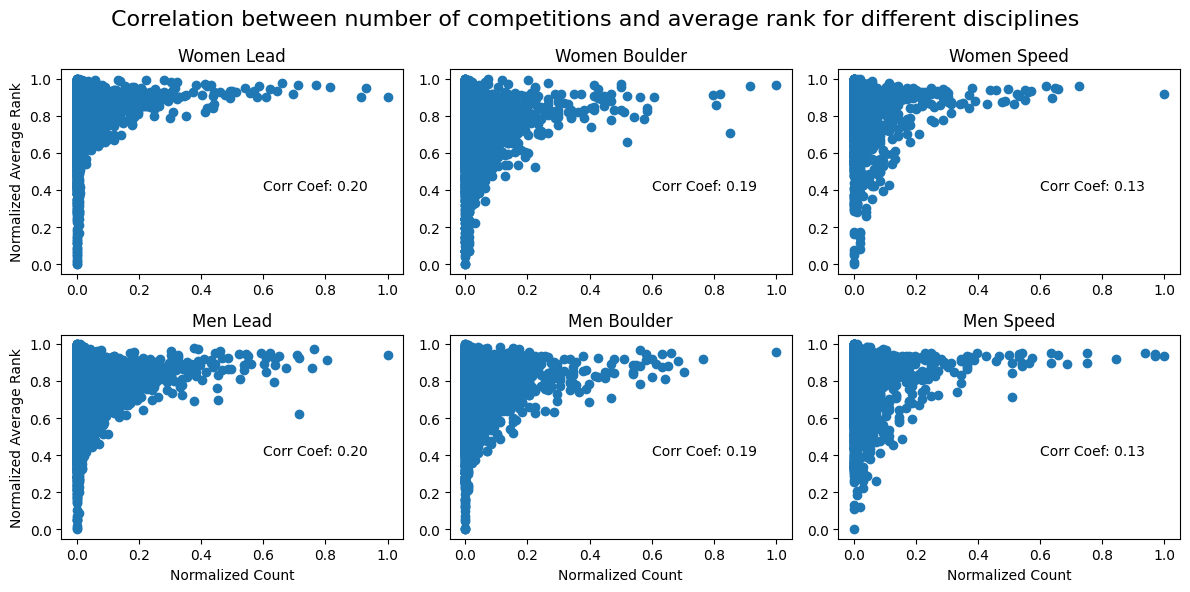

In [351]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Correlation between number of competitions and average rank for different disciplines', fontsize=16)

ax[0,0].scatter(normalize(women_df, 'lead')['Norm_Count'], normalize(women_df, 'lead')['Norm_Rank'])
ax[0,0].set_title('Women Lead')
ax[0,0].set_ylabel('Normalized Average Rank')
cor = normalize(women_df, 'lead')['Norm_Count'].corr(normalize(women_df, 'lead')['Norm_Rank']) #calculate correlation coefficient
ax[0,0].text(0.6, 0.4, f'Corr Coef: {cor:.2f}', fontsize=10)

ax[0,1].scatter(normalize(women_df, 'boulder')['Norm_Count'], normalize(women_df, 'boulder')['Norm_Rank'])
ax[0,1].set_title('Women Boulder')
cor = normalize(women_df, 'boulder')['Norm_Count'].corr(normalize(women_df, 'boulder')['Norm_Rank'])
ax[0,1].text(0.6, 0.4, f'Corr Coef: {cor:.2f}', fontsize=10)

ax[0,2].scatter(normalize(women_df, 'speed')['Norm_Count'], normalize(women_df, 'speed')['Norm_Rank'])
ax[0,2].set_title('Women Speed')
cor = normalize(women_df, 'speed')['Norm_Count'].corr(normalize(women_df, 'speed')['Norm_Rank'])
ax[0,2].text(0.6, 0.4, f'Corr Coef: {cor:.2f}', fontsize=10)

ax[1,0].scatter(normalize(men_df, 'lead')['Norm_Count'], normalize(men_df, 'lead')['Norm_Rank'])
ax[1,0].set_title('Men Lead')
ax[1,0].set_xlabel('Normalized Count')
ax[1,0].set_ylabel('Normalized Average Rank')
cor = normalize(men_df, 'lead')['Norm_Count'].corr(normalize(men_df, 'lead')['Norm_Rank'])
ax[1,0].text(0.6, 0.4, f'Corr Coef: {cor:.2f}', fontsize=10)

ax[1,1].scatter(normalize(men_df, 'boulder')['Norm_Count'], normalize(men_df, 'boulder')['Norm_Rank'])
ax[1,1].set_title('Men Boulder')
ax[1,1].set_xlabel('Normalized Count')
cor = normalize(men_df, 'boulder')['Norm_Count'].corr(normalize(men_df, 'boulder')['Norm_Rank'])
ax[1,1].text(0.6, 0.4, f'Corr Coef: {cor:.2f}', fontsize=10)

ax[1,2].scatter(normalize(men_df, 'speed')['Norm_Count'], normalize(men_df, 'speed')['Norm_Rank'])
ax[1,2].set_title('Men Speed')
ax[1,2].set_xlabel('Normalized Count')
cor = normalize(men_df, 'speed')['Norm_Count'].corr(normalize(men_df, 'speed')['Norm_Rank'])
ax[1,2].text(0.6, 0.4, f'Corr Coef: {cor:.2f}', fontsize=10)

plt.tight_layout()

plt.show()


### **Question 3 conclusions:**
The correlation coefficient for each discipline and gender is less than 0.20, indicating a very small correlation between the number of competitions and average rank. However, examining the plots reveals that athletes with a higher number of participations tend to achieve higher positions. Conversely, many climbers with few participations (even just one) often have a low rank, which might explain why they do not participate in more events.